<a href="https://colab.research.google.com/github/cho52o/statistical_overall_design2021/blob/main/data2_csv%EC%9E%90%EB%A3%8C%EB%A7%8C%EB%93%A4%EA%B8%B0%EC%A0%84%EC%B2%B4%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B0%95%EC%B4%88%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data2

신문사: 경향신문, 동아일보, 조선일보, 중앙일보, 한겨레, 한국경제

기간: 18.03.01~21.03.01  

삼성  
정치,경제,사회,국제,IT_과학  
14,528건

LG  
정치,경제,사회,국제,IT_과학  
190건

SK하이닉스  
정치,경제,사회,국제,IT_과학  
1,891건

카카오  
정치,경제,사회,국제,문화  
13건

CJ  
정치,경제,사회,국제,문화  
1,907건

신세계  
정치,경제,사회,국제,문화  
976건

# 필수 불러오기

### 한국 주식 데이터: KRX

In [ ]:
!pip install -U finance-datareader
import FinanceDataReader as fdr
df_krx=fdr.StockListing('KRX')
df_krx.info()

Requirement already up-to-date: finance-datareader in /usr/local/lib/python3.7/dist-packages (0.9.31)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7211 entries, 0 to 7210
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          7211 non-null   object        
 1   Market          7211 non-null   object        
 2   Name            7211 non-null   object        
 3   Sector          2438 non-null   object        
 4   Industry        2419 non-null   object        
 5   ListingDate     2438 non-null   datetime64[ns]
 6   SettleMonth     2438 non-null   object        
 7   Representative  2438 non-null   object        
 8   HomePage        2258 non-null   object        
 9   Region          2438 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 619.7+ KB


In [ ]:
def get_data(symbol,start,end):
  return fdr.DataReader(symbol,start,end)

### 구글 드라이브 연동

* 주식 데이터 불러올 때 사용

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### package

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import datetime as dt

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# 기업별 자료 불러오기

### 삼성

In [ ]:
stem1 = get_data('005930','2018-03-01','2021-03-01') #삼성전자

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2/SS_20180301-20210301.csv")

### SK

In [ ]:
stem1 = get_data('000660','2018-03-01','2021-03-01') # SK하이닉스

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2/SK_20180301-20210301.csv")

### LG

In [ ]:
stem1 = get_data('003550','2018-03-01','2021-03-01') # LG

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2/LG_20180301-20210301.csv")

### SSG

In [ ]:
stem1 = get_data('001040','2018-03-01','2021-03-01') # 신세계

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2/SSG_20180301-20210301.csv")

### CJ

In [ ]:
stem1 = get_data('001040','2018-03-01','2021-03-01') # CJ

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2/CJ_20180301-20210301.csv")

### KAKAO

In [ ]:
stem1 = get_data('035720','2018-03-01','2021-03-01') # 카카오

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2/KAKAO_20180301-20210301.csv")

# 키워드 저장

### 변동이 큰 날짜 추출

> ex2

In [ ]:
# 현호님 코드
s=stem1['Close']
d = pd.Series(s.values[1:] - s.values[:-1], index=s.index[:-1]).abs()
a = .7  # LG와 KAKAO는 point 5개 나옴. 기울기를 .9로 변환. 
m = d.max()
ex=d > m * a
ex[ex]

Date
2020-03-23    True
2021-01-07    True
dtype: bool

In [ ]:
exex=ex[ex]
ex1=exex.to_frame()
ex1.reset_index(inplace=True)
ex2=ex1.iloc[:,0]
vls=[ex2[i].strftime('%Y-%m-%d') for i in range(len(ex2))]

In [ ]:
print(ex2)

0   2020-03-23
1   2021-01-07
Name: Date, dtype: datetime64[ns]


### data copy

> data1

In [ ]:
# 데이터 처리 과정에서 실패하면 빠르게 다시 돌아올 수 있게 원본은 건드리지 말기.
data1 = data.copy()

데이터 크기 확인 

In [ ]:
data1.shape

(1907, 19)

### '일자'열을 활용하여 datetime 형식의 'date'열 생성

In [ ]:
# 일자를 활용하여 datetime 열 생성. 
data1['date'] = pd.to_datetime(data1['일자'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

### datetime을 계산할 수 있는 숫자 타입으로 전환

In [ ]:
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

## 키워드 추출


> 날짜 단위로 단어를 하나의 리스트로 관리

### 일주일 데이터

#### 변곡점 기준 전 후 일주일 날짜 추출

> a0  
> b0  

In [ ]:
# 변곡점을 기준으로 앞뒤 일주일 계산.(변곡점: a0, b0) 
a_7 = to_integer((ex2[0] - dt.timedelta(days=7)).date())
a0 = to_integer(ex2[0].date())
a7 = to_integer((ex2[0] + dt.timedelta(days=7)).date())
b_7 = to_integer((ex2[1] - dt.timedelta(days=7)).date())
b0 = to_integer(ex2[1].date())
b7 = to_integer((ex2[1] + dt.timedelta(days=7)).date())
print(a_7, a0, a7, b_7, b0, b7)

20200316 20200323 20200330 20201231 20210107 20210114


#### 위의 날짜 기준 데이터 추출


> vls0_7: 첫번째 변곡점 기준 일주일 전 뉴스  
> vls07: 첫번째 변곡점 기준 일주일 후 뉴스  
> vls1_7: 두번째 변곡점 기준 일주일  뉴스  
> vls17: 두번째 변곡점 기준 일주일 후 뉴스  

In [ ]:
# 위에서 계산한 날짜를 기준으로 dataframe 생성. 
data2 = data1[data1["일자"]>= a_7]
vls0_7 = data2[data2["일자"]<= a0]  # vls0_7: 첫번째 변곡점 기준 일주일 전 뉴스
data3 = data1[data1["일자"]>= a0]
vls07 = data3[data3["일자"]<= a7]  # vls07: 첫번째 변곡점 기준 일주일 후 뉴스
data4 = data1[data1["일자"]>= b_7]
vls1_7 = data4[data4["일자"]<= b0]  # vls1_7: 두번째 변곡점 기준 일주일  뉴스
data5 = data1[data1["일자"]>= b0]
vls17 = data5[data5["일자"]<= b7]  # vls17: 두번째 변곡점 기준 일주일 후 뉴스

#### '키워드'열의 Null 확인

In [ ]:
# null 값 확인. 
print(vls0_7["키워드"].isnull().sum())
print(vls07["키워드"].isnull().sum())
print(vls1_7["키워드"].isnull().sum())
print(vls17["키워드"].isnull().sum())

0
0
0
0


#### 날짜별 단어 추출

> date: 날짜  
> df_list: 단어  

In [ ]:
# vls0_7, vls07, vls1_7, vls17
df = vls0_7
n = len(df.groupby("date")) # 일주일 중 데이터가 있는 날짜 수
df_list = [pd.DataFrame() for x in range(n)] # 날짜별 하나의 리스트로 생성
date = list() # 날짜를 리스트로 생성
k=0 # 리스트 번호
j=1 # 다음 날짜와 i(반복문) 날짜가 같은지 확인
for i in df.index:
  if df['date'][i] == df['date'][df.index[j]]:
    df_list[k] = df_list[k].append(pd.DataFrame(df['키워드'][i].split(","), columns=["키워드"]), ignore_index = True)
    if j < len(df)-1:
      j+=1
  elif (j>2 and df['date'][i] != df['date'][df.index[j-2]]):
    df_list[k] = df_list[k].append(pd.DataFrame(df['키워드'][i].split(","), columns=["키워드"]), ignore_index = True)
    date.append(df['date'][df.index[j-1]])
    k+=1
    if j < len(df)-1:
      j+=1
    print(df['date'][i], df['date'][df.index[j]], i, j, k)
  else:
    if j == 1: # 첫번째 기사와 두번째 기사의 날짜가 다른 경우
      df_list[k] = df_list[k].append(pd.DataFrame(df['키워드'][i].split(","), columns=["키워드"]), ignore_index = True)
    k+=1
    date.append(df['date'][df.index[j-1]])
    if j < len(df)-1:
      j+=1
    print(df['date'][i], df['date'][df.index[j]], i, j, k)
date.append(df['date'][df.index[j]])
print("k =",k)
print(df_list[0].count())

2020-03-23 2020-03-22 4663 31 1
2020-03-22 2020-03-21 4666 34 2
2020-03-21 2020-03-20 4671 39 3
2020-03-20 2020-03-19 4701 69 4
2020-03-19 2020-03-18 4717 85 5
2020-03-18 2020-03-17 4746 114 6
2020-03-17 2020-03-16 4768 136 7
k = 7
키워드    4915
dtype: int64


### 연도별 데이터

#### 연도별 기준 날짜 추출: 3월 1일 

> ex3  

In [ ]:
ex3 = [20180301, 20190301, 20200301, 20210301]
ex3

[20180301, 20190301, 20200301, 20210301]

#### 기준 날짜별 데이터 추출

> y18  
> y19  
> y20  

In [ ]:
# 위에서 계산한 날짜를 기준으로 dataframe 생성. 
data2 = data1[data1["일자"]>= ex3[0]]
y18 = data2[data2["일자"]< ex3[1]]  # y18: 180301-190228
data3 = data1[data1["일자"]>= ex3[1]]
y19 = data3[data3["일자"]< ex3[2]]  # y19: 190301-200229 (20년은 윤년)
data4 = data1[data1["일자"]>= ex3[2]]
y20 = data4[data4["일자"]< ex3[3]]  # y20: 200301-210228

#### 연도별 날짜별 단어 추출

> date: 날짜  
> df_list: 단어  

In [ ]:
# y18, y19, y20
# data1
df = data1
n = len(df.groupby("date")) # 일주일 중 데이터가 있는 날짜 수
df_list = [pd.DataFrame() for x in range(n)] # 날짜별 하나의 리스트로 생성
date = list() # 날짜를 리스트로 생성
k=0 # 리스트 번호
j=1 # 다음 날짜와 i(반복문) 날짜가 같은지 확인
for i in df.index:
  if df['date'][i] == df['date'][df.index[j]]:
    df_list[k] = df_list[k].append(pd.DataFrame(df['키워드'][i].split(","), columns=["키워드"]), ignore_index = True)
    if j < len(df)-1:
      j+=1
  elif (j>2 and df['date'][i] != df['date'][df.index[j-2]]):
    df_list[k] = df_list[k].append(pd.DataFrame(df['키워드'][i].split(","), columns=["키워드"]), ignore_index = True)
    k+=1
    if j < len(df)-1:
      date.append(df['date'][i])
      j+=1
  else:
    if j == 1: # 첫번째 기사와 두번째 기사의 날짜가 다른 경우
      df_list[k] = df_list[k].append(pd.DataFrame(df['키워드'][i].split(","), columns=["키워드"]), ignore_index = True)
    k+=1
    if j < len(df)-1:
      date.append(df['date'][i])
      j+=1
date.append(df['date'][df.index[j]])
print("i =",i, "j =",j, "k =",k)

i = 1906 j = 1906 k = 671


## 날짜 데이터 저장: 전처리 확인용

> li: 원본 데이터의 날짜

In [ ]:
li = df['date']

### 중복되지 않게 날짜 추출

> new_list  

In [ ]:
my_list = li
new_list = []
for v in my_list:
    if v not in new_list:
        new_list.append(v)
print(new_list)
print(len(new_list))

['2021-02-25', '2021-02-23', '2021-02-22', '2021-02-20', '2021-02-19', '2021-02-17', '2021-02-16', '2021-02-15', '2021-02-08', '2021-02-07', '2021-02-06', '2021-02-05', '2021-02-04', '2021-02-02', '2021-01-22', '2021-01-20', '2021-01-19', '2021-01-18', '2021-01-17', '2021-01-14', '2021-01-13', '2021-01-12', '2021-01-11', '2021-01-08', '2021-01-07', '2021-01-06', '2021-01-05', '2021-01-04', '2020-12-29', '2020-12-27', '2020-12-24', '2020-12-23', '2020-12-22', '2020-12-18', '2020-12-17', '2020-12-16', '2020-12-15', '2020-12-11', '2020-12-10', '2020-12-07', '2020-12-06', '2020-12-02', '2020-11-30', '2020-11-25', '2020-11-24', '2020-11-23', '2020-11-20', '2020-11-12', '2020-11-11', '2020-11-10', '2020-11-09', '2020-11-06', '2020-11-05', '2020-11-03', '2020-11-02', '2020-10-28', '2020-10-27', '2020-10-26', '2020-10-23', '2020-10-22', '2020-10-21', '2020-10-20', '2020-10-19', '2020-10-18', '2020-10-17', '2020-10-15', '2020-10-14', '2020-10-13', '2020-10-11', '2020-10-07', '2020-10-06', '2020

## 빈도 계산

### 날짜 데이터와 키워드 데이터의 크기 비교: 전처리 확인용

In [ ]:
df_list[k].head(2)

,키워드
0,공정위
1,SK


In [ ]:
for i in range(k+1):
  if len(df_list[i]) == 0:
    print(i)

In [ ]:
print(len(date))
print(len(df_list))

672
672


In [ ]:
#date = new_list

In [ ]:
#del df_list[1]
#k -= 1

### 단어 빈도 계산

> df_bin  
> df_bin_sort: 날짜별 단어 빈도 내림차순 정렬  

In [ ]:
# 키워드별 빈도 수 계산 및 정렬. 
df_bin = [pd.DataFrame() for x in range(n)]
df_bin_sort = [pd.DataFrame() for x in range(n)]
for i in range(k+1):
  df_bin[i] = df_list[i].groupby(['키워드']).size().reset_index() # 계산
  df_bin[i].rename(columns = {0: '빈도'}, inplace = True) # column명 '빈도'로 변경
  df_bin_sort[i] = df_bin[i].sort_values(by=['빈도'], axis=0, ascending=False) # 인덱스 정렬(내림차순)

In [ ]:
df_bin[k]
df_bin_sort[k].head(2)

,키워드,빈도
97,회사,9
79,지주,9


### 단어 빈도 데이터 저장

In [ ]:
#date

In [ ]:
#df_bin_sort[0].to_csv("/content/drive/MyDrive/통계적종합설계/data2_day1/CJ210120.csv")
#df_bin_sort[1].to_csv("/content/drive/MyDrive/통계적종합설계/data2_day1/CJ210119.csv")
#df_bin_sort[2].to_csv("/content/drive/MyDrive/통계적종합설계/data2_day1/CJ210118.csv")
#df_bin_sort[3].to_csv("/content/drive/MyDrive/통계적종합설계/data2_day1/CJ210117.csv")
#df_bin_sort[4].to_csv("/content/drive/MyDrive/통계적종합설계/data2_day1/CJ210114.csv")
#df_bin_sort[5].to_csv("/content/drive/MyDrive/통계적종합설계/data2_day1/CJ210113.csv")
#df_bin_sort[6].to_csv("/content/drive/MyDrive/통계적종합설계/data2_day1/CJ210113.csv")
#df_bin_sort[7].to_csv("/content/drive/MyDrive/통계적종합설계/data2_day1/CJ210113.csv")

# 뉴스 데이터 합치기

## 단어 빈도 데이터 불러오기

### 저장된 데이터 사용

#### 데이터 불러오기

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/data2_day1/CJ210113.csv')
df2 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/data2_day1/CJ210114.csv')
df3 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/data2_day1/CJ210117.csv')
df4 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/data2_day1/CJ210118.csv')
df5 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/data2_day1/CJ210119.csv')
df6 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/data2_day1/CJ210120.csv')
df7 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/data2_day1/SS200329.csv')
df8 = pd.read_csv('/content/drive/MyDrive/통계적종합설계/data2_day1/SS200330.csv')

#### 단어를 열로 설정

In [ ]:
df = df1.T.tail(2)
df1 = df1.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])
df = df2.T.tail(2)
df2 = df2.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])
df = df3.T.tail(2)
df3 = df3.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])
df = df4.T.tail(2)
df4 = df4.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])
df = df5.T.tail(2)
df5 = df5.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])
df = df6.T.tail(2)
df6 = df6.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])
df = df7.T.tail(2)
df7 = df7.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])
df = df8.T.tail(2)
df8 = df8.T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])

In [ ]:
#ind = pd.date_range(start='2020-03-23', end='2020-03-30')

### 위에서 실행된 데이터 사용

#### 단어 데이터 하나의 리스트로 저장

In [ ]:
dfs = []
for i in range(k+1):
    df = pd.DataFrame(df_bin_sort[i])
    # ...
    dfs.append(df)

#### 단어를 열로 설정

In [ ]:
for i in range(k+1):
  df = dfs[i].T.tail(2)
  dfs[i] = dfs[i].T.tail(2).rename(columns=df.iloc[0]).drop(['키워드'])

In [ ]:
for i in range(k+1):
  if len(dfs[i]) == 0:
    print(i)

In [ ]:
#date

In [ ]:
#date1 = date[1:]

In [ ]:
#date1 = sorted(date)

In [ ]:
#date1 = date1[1:]

In [ ]:
date2 = pd.to_datetime(date)

## 각각의 데이터를 하나로 합치기

In [ ]:
#da = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], ignore_index=True)

In [ ]:
da = pd.concat(dfs, ignore_index=True)

## index를 날짜로 변경

In [ ]:
da1 = da.set_index(date2)

In [ ]:
da1 = da1.sort_index()
da1.head()

,매각,지분,CJ,CJ대한통운,중국,강화,73.1%,성장,자회사,미래,사모펀드,전량,물류,스틱씨제이글로벌투자파트너십펀드,스틱인베스트먼트,예정일,스틱글로벌투자1호,성장성,선택,예정,재무,운용,의미,자금,중국시장,지속,지속적,집중,출자,투자,특수목적법인,파운틴베스트파트너스,사업,법인,사모투자펀드,기재,SPC,개선,결정,경쟁력,...,오픈마켓,24개월,USIM,사용액,영수증,원쯤,쿠쿠,판매상품,심의소,CUCKOO,관계사들,노심초사,벌점,실구매,사내이,장교,투자자금,텀블러아시아,채무보증,총력전,충당,고육지책,860여,8건,CJ푸드유럽,세금차감전이익,웨딩홀사업부,만성적,만성적자,베이징베이커리,사업연도,대기업집단,기업집단국장,재벌개혁,임대수익,웅진,신봉삼,24곳,스마일게이트홀딩스,손자회사
2018-03-01,NaN,NaN,1,NaN,NaN,1,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,1,1,1,1,1,1
2018-03-06,2,2,12,NaN,1,1,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,3,3,NaN,NaN,NaN,4,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-09,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-12,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,6,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-15,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## NaN -> 0

In [ ]:
da2 = da1.fillna(0)
da2.head()

,매각,지분,CJ,CJ대한통운,중국,강화,73.1%,성장,자회사,미래,사모펀드,전량,물류,스틱씨제이글로벌투자파트너십펀드,스틱인베스트먼트,예정일,스틱글로벌투자1호,성장성,선택,예정,재무,운용,의미,자금,중국시장,지속,지속적,집중,출자,투자,특수목적법인,파운틴베스트파트너스,사업,법인,사모투자펀드,기재,SPC,개선,결정,경쟁력,...,오픈마켓,24개월,USIM,사용액,영수증,원쯤,쿠쿠,판매상품,심의소,CUCKOO,관계사들,노심초사,벌점,실구매,사내이,장교,투자자금,텀블러아시아,채무보증,총력전,충당,고육지책,860여,8건,CJ푸드유럽,세금차감전이익,웨딩홀사업부,만성적,만성적자,베이징베이커리,사업연도,대기업집단,기업집단국장,재벌개혁,임대수익,웅진,신봉삼,24곳,스마일게이트홀딩스,손자회사
2018-03-01,0,0,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,1,1
2018-03-06,2,2,12,0,1,1,0,0,4,0,0,0,0,0,0,0,0,0,1,2,3,0,0,4,0,0,0,0,0,1,0,0,3,3,0,0,0,4,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
2018-03-09,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-03-12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,6,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-03-15,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 데이터 저장

In [ ]:
#da2.to_csv("/content/drive/MyDrive/통계적종합설계/data2_year/CJ180301-210301.csv")

# 분석 파일로 이동

단변량회귀 + 다변량회귀

In [ ]:
stem1 = get_data('005930','2018-03-01','2021-03-01') #삼성전자

In [ ]:
SS = pd.read_csv("/content/drive/MyDrive/통계적종합설계/data2_day7/SS200316-200323.csv", index_col=0)
SS.index = pd.to_datetime(SS.index)

In [ ]:
data1 = stem1.loc['2020-03-16':'2020-03-23',]

In [ ]:
data1

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-03-16,50100,50900,48800,48900,33339821,-0.021021
2020-03-17,46900,49650,46700,47300,51218151,-0.032720
2020-03-18,47750,48350,45600,45600,40152623,-0.035941
2020-03-19,46400,46650,42300,42950,56925513,-0.058114
2020-03-20,44150,45500,43550,45400,49730008,0.057043
2020-03-23,42600,43550,42400,42500,41701626,-0.063877


In [ ]:
SS.index = pd.to_datetime(SS.index)

In [ ]:
ss = SS[SS.index.to_series().dt.dayofweek < 5]

In [ ]:
ss1 = ss // 10
ss1 = ss1.append(ss1.sum(axis=0), ignore_index=True)
ss1 = ss1.loc[:,ss1.loc[6,:]>0]
ss = ss.loc[:,ss1.columns]

In [ ]:
df = pd.concat([data1,ss],axis = 1)

In [ ]:
# 단변량 회귀 방법1
import statsmodels.api as sm
X=df['삼성전자']
Y=df['Close']
X=sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.249
Method:                 Least Squares   F-statistic:                  0.003374
Date:                Thu, 22 Apr 2021   Prob (F-statistic):              0.956
Time:                        08:43:55   Log-Likelihood:                -54.816
No. Observations:                   6   AIC:                             113.6
Df Residuals:                       4   BIC:                             113.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.567e+04   4018.165     11.365      0.000    3.45e+04    5.68e+04
삼성전자          -2.2334     38.452     -0.058      0.956    -108.993     104.526
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.921
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.427
Skew:                           0.045   Prob(JB):                        0.808
Kurtosis:                       1.696   Cond. No.                         374.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 단변량 회귀 방법2
import statsmodels.api as sm
from statsmodels.formula.api import ols
results=ols('Close~삼성전자',data=df).fit()
print(results.f_pvalue < 0.05)
print(results.summary())

False
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.249
Method:                 Least Squares   F-statistic:                  0.003374
Date:                Thu, 22 Apr 2021   Prob (F-statistic):              0.956
Time:                        08:43:57   Log-Likelihood:                -54.816
No. Observations:                   6   AIC:                             113.6
Df Residuals:                       4   BIC:                             113.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.567e+04   4018.165     11.365   

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



## 일반

In [ ]:
li1 = []
li2 = []
for i in ss:
  X = df.loc[:,i]
  Y = df['Close']
  X = sm.add_constant(X)
  model = sm.OLS(Y,X)
  results = model.fit()
  li1.append(i)
  li2.append(results.f_pvalue)

In [ ]:
df1 = pd.DataFrame({"word":li1})
df1['pvalue']=li2

In [ ]:
import numpy as np
df1 = pd.DataFrame(df1)
df1 = df1.fillna(0)
df1 = df1.sort_values(["pvalue"])
df1

,word,pvalue
191,추가,0.015096
19,포럼,0.033345
165,모델,0.042698
63,판매,0.044847
148,TV,0.053303
...,...,...
80,주총,0.986447
196,보조금,0.987563
197,모집,0.987563
92,배터리,0.990087


<function matplotlib.pyplot.show>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52628 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44032 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54252 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47100 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47784 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45944 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54032 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

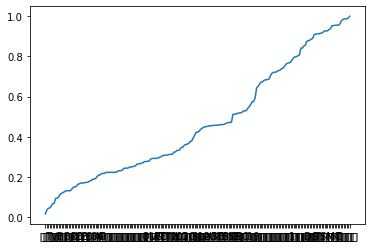

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df1["word"], df1['pvalue'])
plt.show

In [ ]:
df2=df1[df1['pvalue']<=0.05]
#df2=df2.drop([1,260,243,244])
df2

,word,pvalue
191,추가,0.015096
19,포럼,0.033345
165,모델,0.042698
63,판매,0.044847


의미없는 단어)삼성, 단위, 1개, 배경

In [ ]:
df.loc[:,df2["word"]]

,추가,포럼,모델,판매
2020-03-16,0,13,0,3
2020-03-17,0,6,2,1
2020-03-18,0,0,6,13
2020-03-19,12,0,17,24
2020-03-20,4,0,15,3
2020-03-23,11,0,11,16


기사를 1주일전껄로 예측, 전날껄로 예측

In [ ]:
df

,Open,High,Low,Close,Volume,Change,삼성전자,삼성,시장,안전,스마트폰,파운드리,BBK,임직원,중국,이사,세계,오포,점유,미국,반도체,코로나19,비보,케이스,환경,포럼,변호사,리얼미,생산,화웨이,브랜드,수사,원플러스,협력사,회사,연기,공정,계열사,인도,행사,...,2020년,AI,중단,가전,운영,참석,QLED,8K,가전제품,격차,사운드,방침,마스크,ETN,WTI,IoT,폐쇄,의장,매장,효율,화면,플립,채용,단체,추가,구매,슬로바키아,23일,25일,보조금,모집,AP,혜택,노이다,환급,으뜸,제보,신고,푸네,할인
2020-03-16,50100,50900,48800,48900,33339821,-0.021021,57,51,37,23,23,20,18,17,17,16,16,15,14,14,13,13,13,13,13,13,12,12,12,11,11,11,10,10,10,9,9,8,8,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-17,46900,49650,46700,47300,51218151,-0.032720,133,13,39,2,44,4,0,0,14,8,18,1,5,14,13,14,0,0,1,6,3,0,5,2,2,0,0,0,5,13,1,1,1,13,...,2,2,2,2,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-18,47750,48350,45600,45600,40152623,-0.035941,126,39,62,3,33,11,0,2,15,22,13,0,11,12,31,42,0,0,3,0,1,0,8,1,3,0,0,1,11,2,4,0,3,5,...,0,10,1,11,8,20,3,3,1,8,0,12,18,35,20,13,11,10,10,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-19,46400,46650,42300,42950,56925513,-0.058114,65,36,15,0,3,2,0,6,4,1,8,0,0,5,6,22,0,0,1,0,0,0,6,0,5,3,0,1,5,0,0,2,0,1,...,14,10,3,3,3,2,26,21,0,0,13,2,0,12,8,0,2,0,0,0,16,10,1,15,12,4,2,2,1,0,0,0,0,0,0,0,0,0,0,0
2020-03-20,44150,45500,43550,45400,49730008,0.057043,116,20,30,5,2,27,0,1,19,2,6,0,14,10,23,35,0,0,1,0,0,0,18,0,2,0,0,0,7,4,17,2,0,0,...,6,2,21,3,5,0,13,9,0,11,1,2,13,3,0,3,7,0,0,0,5,0,22,0,4,0,29,9,0,17,11,3,1,0,0,0,0,0,0,0
2020-03-23,42600,43550,42400,42500,41701626,-0.063877,105,109,43,5,46,0,0,5,10,0,8,4,16,22,1,23,3,0,0,0,1,0,63,2,2,1,0,2,1,5,0,24,59,6,...,0,4,55,36,16,1,1,3,22,0,0,7,0,21,12,0,9,0,8,27,0,0,0,2,11,25,3,18,13,0,0,13,19,30,23,21,17,16,14,13


In [ ]:
X=df[['안전','스마트폰','파운드리','BBK']]
Y=df['Close']
X=sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     7.289
Date:                Thu, 22 Apr 2021   Prob (F-statistic):              0.270
Time:                        08:45:43   Log-Likelihood:                -44.599
No. Observations:                   6   AIC:                             99.20
Df Residuals:                       1   BIC:                             98.16
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.198e+04   1152.859     36.411      0.017    2.73e+04    5.66e+04
안전         -1083.1458    363.217     -2.982      0.206   -5698.254    3531.963
스마트폰         129.0320     37.664      3.426      0.181    -349.532     607.596
파운드리         309.0511     81.903      3.773      0.165    -731.630    1349.733
BBK         1260.3904    375.743      3.354      0.184   -3513.879    6034.659
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.863
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.461
Skew:                          -0.678   Prob(JB):                        0.794
Kurtosis:                       2.927   Cond. No.                         90.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X=df.loc[:,df2["word"].head(4)]
Y=df['Close']
X=sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     126.2
Date:                Thu, 22 Apr 2021   Prob (F-statistic):             0.0667
Time:                        08:45:48   Log-Likelihood:                -36.141
No. Observations:                   6   AIC:                             82.28
Df Residuals:                       1   BIC:                             81.24
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.512e+04    409.507    110.177      0.006    3.99e+04    5.03e+04
추가          -326.2238     44.926     -7.261      0.087    -897.063     244.616
포럼           299.3595     37.797      7.920      0.080    -180.894     779.613
모델           110.8707     38.081      2.911      0.211    -372.998     594.739
판매            -9.8905     21.615     -0.458      0.727    -284.539     264.758
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.731
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.918
Skew:                           0.782   Prob(JB):                        0.632
Kurtosis:                       1.892   Cond. No.                         72.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 로그

In [ ]:
li1 = []
li2 = []
for i in ss:
  X = df.loc[:,i]
  Y = np.log(df['Close'])
  X = sm.add_constant(X)
  model = sm.OLS(Y,X)
  results = model.fit()
  li1.append(i)
  li2.append(results.f_pvalue)

In [ ]:
df_log = pd.DataFrame({"word":li1})
df_log['pvalue']=li2

In [ ]:
import numpy as np
df_log = pd.DataFrame(df_log)
df_log = df_log.fillna(0)
df_log = df_log.sort_values(["pvalue"])
df_log

,word,pvalue
191,추가,0.013072
19,포럼,0.038300
63,판매,0.042880
165,모델,0.044919
148,TV,0.055635
...,...,...
62,투자,0.994302
92,배터리,0.995170
196,보조금,0.995872
197,모집,0.995872


<function matplotlib.pyplot.show>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52628 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44032 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54252 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47100 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54032 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47588 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47784 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

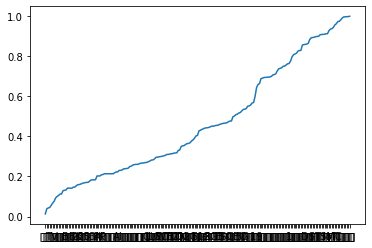

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_log["word"], df_log['pvalue'])
plt.show

In [ ]:
df_log2 = df_log[df_log['pvalue']<=0.05]
#df2=df2.drop([1,260,243,244])
df_log2

,word,pvalue
191,추가,0.013072
19,포럼,0.038300
63,판매,0.042880
165,모델,0.044919


In [ ]:
X=df.loc[:,df_log2["word"].head(4)]
Y=df['Close']
X=sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     5.916
Date:                Tue, 27 Apr 2021   Prob (F-statistic):              0.298
Time:                        10:38:28   Log-Likelihood:                -43.760
No. Observations:                   6   AIC:                             97.52
Df Residuals:                       1   BIC:                             96.48
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2302.0747   1457.990     -1.579      0.359   -2.08e+04    1.62e+04
추가          -263.1956    159.953     -1.645      0.348   -2295.589    1769.198
포럼           110.5001    134.570      0.821      0.562   -1599.373    1820.373
판매          -156.6661     76.958     -2.036      0.291   -1134.514     821.182
모델           407.2391    135.583      3.004      0.205   -1315.507    2129.985
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.731
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.918
Skew:                          -0.782   Prob(JB):                        0.632
Kurtosis:                       1.892   Cond. No.                         72.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 차분

In [ ]:
data1 = stem1.loc['2020-03-13':'2020-03-23',].diff()
data1.dropna(inplace=True)

In [ ]:
df = pd.concat([data1,ss],axis = 1)

In [ ]:
li1 = []
li2 = []
for i in ss:
  X = df.loc[:,i]
  Y = df['Close']
  X = sm.add_constant(X)
  model = sm.OLS(Y,X)
  results = model.fit()
  li1.append(i)
  li2.append(results.f_pvalue)

In [ ]:
df_diff = pd.DataFrame({"word":li1})
df_diff['pvalue']=li2

In [ ]:
import numpy as np
df_diff = pd.DataFrame(df_diff)
df_diff = df_diff.fillna(0)
df_diff = df_diff.sort_values(["pvalue"])
df_diff

,word,pvalue
107,트렌드포스,0.001409
30,공정,0.002928
94,TSMC,0.003094
197,모집,0.006343
196,보조금,0.006343
...,...,...
20,변호사,0.970110
50,현대차,0.985052
90,제공,0.987204
194,23일,0.988200


<function matplotlib.pyplot.show>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53944 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47116 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46300 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54252 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49828 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44277 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51221 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

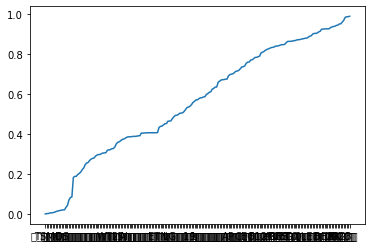

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_diff["word"], df_diff['pvalue'])
plt.show

In [ ]:
df_diff2 = df_diff[df_diff['pvalue']<=0.05]
#df2=df2.drop([1,260,243,244])
df_diff2

,word,pvalue
107,트렌드포스,0.001409
30,공정,0.002928
94,TSMC,0.003094
197,모집,0.006343
196,보조금,0.006343
189,채용,0.007538
92,배터리,0.008995
110,전기차,0.012402
5,파운드리,0.015041
193,슬로바키아,0.016943


In [ ]:
X=df.loc[:,df_diff2["word"].head(4)]
Y=df['Close']
X=sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     149.6
Date:                Tue, 27 Apr 2021   Prob (F-statistic):             0.0612
Time:                        10:39:30   Log-Likelihood:                -34.188
No. Observations:                   6   AIC:                             78.38
Df Residuals:                       1   BIC:                             77.33
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2775.0000    125.000    -22.200      0.029   -4363.276   -1186.724
트렌드포스       1045.0000    222.205      4.703      0.133   -1778.380    3868.380
공정           130.0000     50.000      2.600      0.234    -505.310     765.310
TSMC        -245.0000    175.000     -1.400      0.395   -2468.586    1978.586
모집           -96.8182    347.594     -0.279      0.827   -4513.413    4319.777
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.500
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.000
Skew:                          -0.000   Prob(JB):                         1.00
Kurtosis:                       3.000   Cond. No.                         77.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""